# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [879]:
# Import the appropriate libraries with aliases

import pandas as pd
import numpy as np


# Create two new dataframes

north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
north_df


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [880]:
# EDA Question 1A solution below: 9 Reps
north_df["Rep ID"].unique()

array(['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander'], dtype=object)

#### EDA Question 1B:  How many reps are in the South branch?  

In [881]:
# EDA Question 1B solution Below: 11 Reps in South branch 
south_df["Rep ID"].unique()

array(['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy',
       'George', 'Helga', 'Josh', 'Sharon'], dtype=object)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [882]:
# EDA Question 2A solution Below:
north_df.describe()


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [883]:
# EDA Question 2B solution Below:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [884]:
# EDA Question 3 solution Below:
combined_branch = pd.concat([south_df, north_df])
combined_branch
combined_branch.groupby("Time Block")["Calls"].sum().sort_index()

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9 Reps
- 1b) Reps in the South Branch = 11 Reps


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [885]:
# Question 1 solution below
# checking percentage of miising data on each column of north branch 

for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [886]:
# Checking percentage of miising data on each column of south branch 


for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


#### Record your answer below:

> Your Answer: Both the data sets have missing values for "Incoming wait time" North has 67% missing and South has 60% missing. I'll not drop this column, instead will replace the missing values with the mean value of the Incoming wait time because data in this column is important for our analysis. 

In [887]:
value_north = round(north_df["Incoming Wait Time"].mean(),2)

north_df = north_df.fillna(value_north)

value_south = round(south_df["Incoming Wait Time"].mean(),2)

south_df = south_df.fillna(value_south)




#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [888]:
# Cleaning Question 2 solution below:

north_df["Sale"] = north_df["Sale"].str.strip()

north_df["Sale"].value_counts()


Sale
NO     234
YES     11
Name: count, dtype: int64

##### Record your answer by below:
> Your Answer: It looks two separate "YES" had a leading spaces in front of them. I used strip method to remove the leading spaces. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [889]:
# Cleaning Question 3 solution below:

# Checking if any duplicates in North 

north_df.duplicated().any()  

# count the number of dulpicates

north_df.duplicated().sum()

#  show the duplicated rows

north_df[north_df.duplicated()]

# North has 5 Duplicated rows. Droppinf those rows. 

north_df.drop_duplicates(inplace= True)

north_df

# Checking if any duplicates in South and dropping them.

south_df.duplicated().any()
south_df.duplicated().sum()
south_df[south_df.duplicated()]
south_df.drop_duplicates(inplace= True)
south_df





,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,3.0,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,3.0,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,3.0,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,3.0,2,1


##### Record your answer below:
> Your Answer: North Branch has 5 duplicate rows and 11 Duplicates in South.  I have dropped these rows. 

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [890]:
# Cleaning Question 4 solution below:


# south_df.head()
# north_df.head()

south_df = south_df.drop(columns=["Unnamed: 0"])
north_df = north_df.drop(columns=["Unnamed: 0"])

south_df
north_df



,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.00,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.00,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.00,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.00,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.00,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,3.05,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,3.05,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,3.05,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,3.05,2,1


##### Record your answer below:
> Your Answer: Unnamed row is just the index created for the CSV file. Therefore, droping these columns from the each dataset.
Queue column could be dropped later if doesn't provide any good analyitical values but keep for now.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [891]:
# Create dataframe for the entire company named df

df = pd.concat([north_df, south_df])

df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,3.0,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,3.0,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,3.0,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,3.0,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [892]:
# Manipulation Question solution below:

calls_by_rep = (
    df.groupby(["Rep ID", "Branch"])["Calls"]
    .sum()
    .reset_index()
    .sort_values(["Branch", "Calls"], ascending=[True, False])
    .groupby("Branch")
    .head(1))

calls_by_rep

,Rep ID,Branch,Calls
3,Brent,North,37
6,Eric,South,35


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 Calls
- South Branch = Eric, 35 Calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [893]:
# Manipulation Question 2 solution below: I used two methods  First, crude method to calculate the results and Second a refined coding method I looked up for help. Both the methods gave same answers
total_calls = df["Calls"].sum()

df.describe()
#  1.97% mean of adandoned 

df[df["Branch"] == "North"].describe()

# 2.86% mean of adandoned 

df[df["Branch"] == "South"].describe()

# 1.27% mean of adandoned 

# OR (Second way)

company_abandon_rate = df["Abandoned"].sum() / df["Calls"].sum()
print(f"Company average abandonment rate: {company_abandon_rate:.2%}")

branch_sums = df.groupby("Branch")[["Abandoned", "Calls"]].sum().reset_index()

branch_sums["Abandonment_Rate"] = branch_sums["Abandoned"] / branch_sums["Calls"] * 100
branch_sums


Company average abandonment rate: 1.97%


,Branch,Abandoned,Calls,Abandonment_Rate
0,North,7,245,2.857143
1,South,4,314,1.273885


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.85%
- South Branch = 1.27%
- Company Wide = 1.97 %
- Do any of these fall out of the optimal range of 2-5%? Yes. North Branch has 2.85%

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [894]:
# Manipulation Question 3 solution below: I'm assuming the incoming wait time columns should be considered to calculate the Service level 

total_calls_within_2 = df["Incoming Wait Time"] <= 2.0

company_wide_service_level = total_calls_within_2.sum() / len(df)

print(f"Company Percentage of calls answered within 2 seconds: {company_wide_service_level:.2%}, includes {total_calls_within_2.sum()} of  calls")

#North Branch
north_calls_within_2 = north_df["Incoming Wait Time"] <= 2.0
north_service_level = north_calls_within_2.sum() / len(north_df)

print(f"North Percentage of calls answered within 2 seconds: {north_service_level:.2%}, includes {north_calls_within_2.sum()} of calls")

#South Branch
south_calls_within_2 = south_df["Incoming Wait Time"] <= 2.0
south_service_level = south_calls_within_2.sum() / len(south_df)

print(f"South Percentage of calls answered within 2 seconds: {south_service_level:.2%}, includes {south_calls_within_2.sum()} of calls")

Company Percentage of calls answered within 2 seconds: 14.49%, includes 81 of  calls
North Percentage of calls answered within 2 seconds: 13.47%, includes 33 of calls
South Percentage of calls answered within 2 seconds: 15.29%, includes 48 of calls


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47%
- South Branch = 15.59%
- Company Wide = 14.49%

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [895]:
# Manipulation Question 4 solution below: Since Each row represents 1 call. The average is equal to the mean here. 



north_asa = north_df["Incoming Wait Time"].mean()
print(f"North :average speed of answer,{north_asa:.2f}")

south_asa = south_df["Incoming Wait Time"].mean()
print(f"South :average speed of answer,{south_asa:.2f}")

Company_asa = df["Incoming Wait Time"].mean()
print(f"Company :average speed of answer,{Company_asa:.2f}")



North :average speed of answer,3.05
South :average speed of answer,3.00
Company :average speed of answer,3.02


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 sec
- South Branch in seconds = 3.00 sec
- Company Wide in seconds = 3.02 sec

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\User\AppData\Local\Temp\ipykernel_15476\2792938052.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] *100


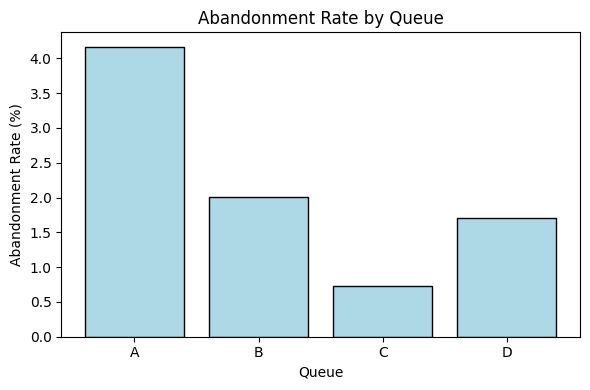

In [896]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import matplotlib.pyplot as plt

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] *100

#Your code below:

plt.figure(figsize = (6,4))
plt.bar(queues, abandonment_rates.values(), color = "lightblue", edgecolor = "black")
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate (%)")
plt.title("Abandonment Rate by Queue")
plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I choose simple bar chart for this visualization for this comparison because we are comparing categories that are not dependent on each other.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

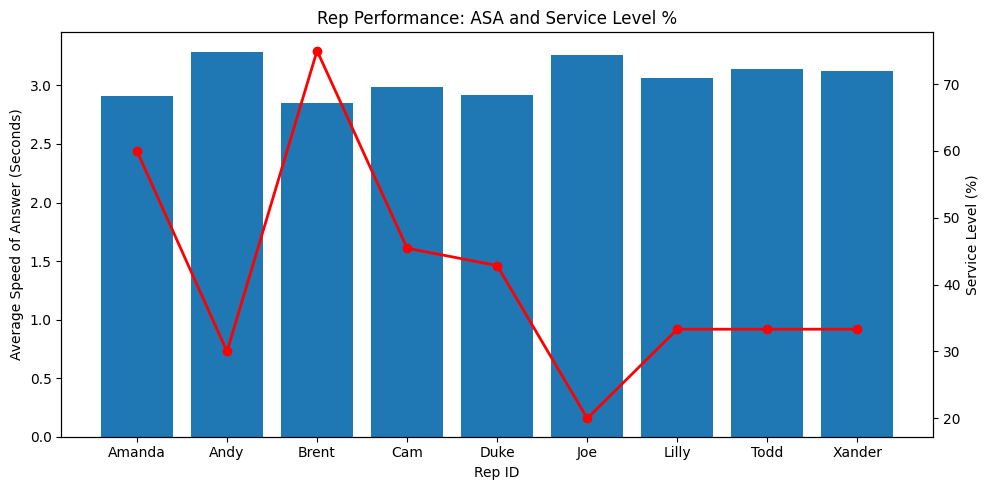

In [897]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum().reset_index()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum().reset_index() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
import matplotlib.pyplot as plt

# Merge ASA + Service Level into one table
combined = pd.merge(
     north_plt.rename(columns={"Incoming Wait Time": "ASA"}),
     service_level[["Rep ID", "Service Level %"]],
     on="Rep ID"
 )

# Sort reps for cleaner plotting
combined = combined.sort_values("Rep ID")

# Plot
fig, ax1 = plt.subplots(figsize=(10,5))

# Bar chart for ASA
ax1.bar(combined["Rep ID"], combined["ASA"], label="ASA (sec)")
ax1.set_xlabel("Rep ID")
ax1.set_ylabel("Average Speed of Answer (Seconds)")
ax1.set_title("Rep Performance: ASA and Service Level %")

# # Second axis for Service Level %
ax2 = ax1.twinx()
ax2.plot(combined["Rep ID"], combined["Service Level %"], marker='o', linewidth=2, label="Service Level %", color = "red")
ax2.set_ylabel("Service Level (%)")

plt.tight_layout()
plt.show()


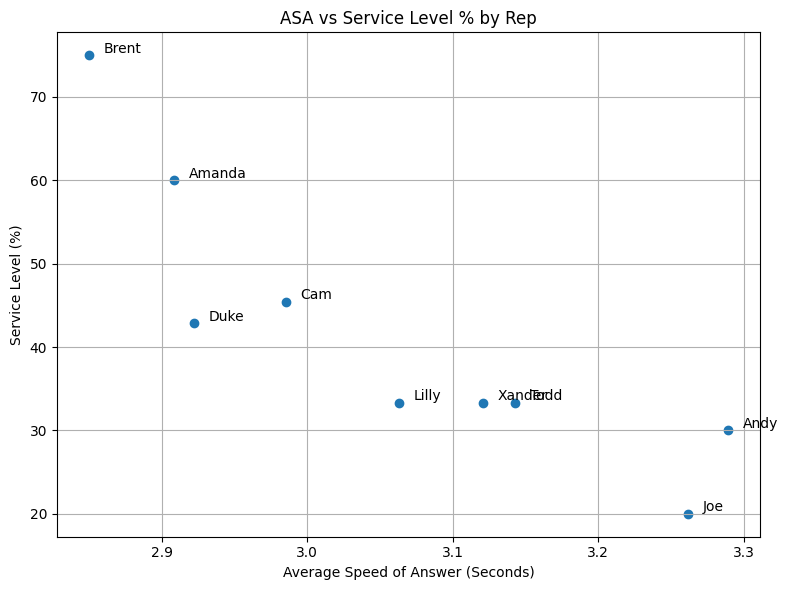

In [898]:
# plotting using Scatter plot


import matplotlib.pyplot as plt

# Use the same merged combined dataset
plt.figure(figsize=(8,6))

plt.scatter(combined["ASA"], combined["Service Level %"])

# Add rep labels on points
for i, row in combined.iterrows():
    plt.text(row["ASA"] + 0.01, row["Service Level %"] + 0.3, row["Rep ID"])

plt.xlabel("Average Speed of Answer (Seconds)")
plt.ylabel("Service Level (%)")
plt.title("ASA vs Service Level % by Rep")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I choose two types of charts, combined charts and scatter plot. I like scatter plot better for analysis. It clearly presents who is a better Rep.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


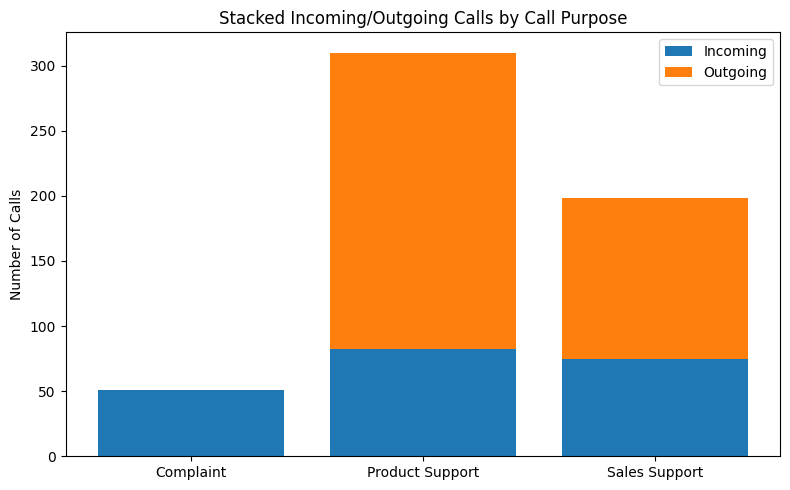

In [899]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
import matplotlib.pyplot as plt


purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

incoming = [
    complaints.get("Incoming", 0),
    product_support.get("Incoming", 0),
    sales_support.get("Incoming", 0)
]

outgoing = [
    complaints.get("Outgoing", 0),
    product_support.get("Outgoing", 0),
    sales_support.get("Outgoing", 0)
]

plt.figure(figsize=(8,5))

plt.bar(call_purpose, incoming, label="Incoming")
plt.bar(call_purpose, outgoing, bottom=incoming, label="Outgoing")

plt.ylabel("Number of Calls")
plt.title("Stacked Incoming/Outgoing Calls by Call Purpose")
plt.legend()
plt.tight_layout()
plt.show()

##### Record your answer below:

> Chart style you chose and why: I choose stacked bar chart to show the total number of calls for each purpose and how many are incoming and outgoing in that. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: Based on the KPIs provided, the South Branch is operating more efficiently. Although both branches have similar average speed of answer (North: 3.05 sec, South: 3.00 sec), the South Branch has a lower average call abandonment rate (1.27% vs. North’s 2.85%) and a slightly higher percentage of calls answered within 2 seconds (15.59% vs. 13.47%). 


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer:The North Branch has 2 Rep less than South branch and their abandoment rate is higher than South branch which means that North Branch is slighltly overburdened than south branch. Therefore, the North Branch would benefit from the extra help.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: Data about the call duration for each type of call would help us identify if the calls with certian purposes take longer and that could be reason for call abandonment. Also, customer satification is a good metrics to calculate the service quality of each branch.

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 